#### Week 3 - Visual Data Analysis

# Lesson 1:  EDA - Exploratory Data Analysis

year                 int64
country             object
continent           object
population         float64
fertility          float64
life expectancy    float64
dtype: object

,year,country,continent,population,fertility,life expectancy
13063,2015,Afghanistan,Asia,32526562.0,4.47,53.8
13064,2015,Albania,Europe,2896679.0,1.78,78.0
13065,2015,Algeria,Africa,39666519.0,2.71,76.4
13066,2015,Angola,Africa,25021974.0,5.65,59.6
13067,2015,Antigua and Barbuda,North America,91818.0,2.06,76.4
...,...,...,...,...,...,...
16739,2015,Wallis et Futuna,NaN,13151.0,NaN,NaN
16740,2015,South Sudan,Africa,12339812.0,NaN,56.1
16741,2015,Curaçao,NaN,157203.0,NaN,NaN
16742,2015,Sint Maarten (Dutch part),NaN,38745.0,NaN,NaN


<Axes: xlabel='fertility', ylabel='life expectancy'>

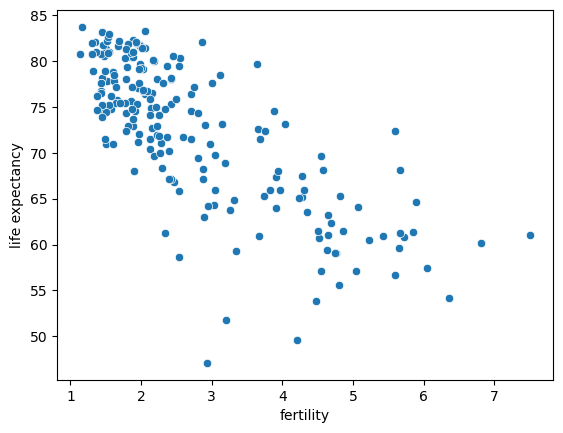

<Axes: title={'center': 'Life Expectancy vs Fertility Rate'}, xlabel='fertility', ylabel='Life Expectancy'>

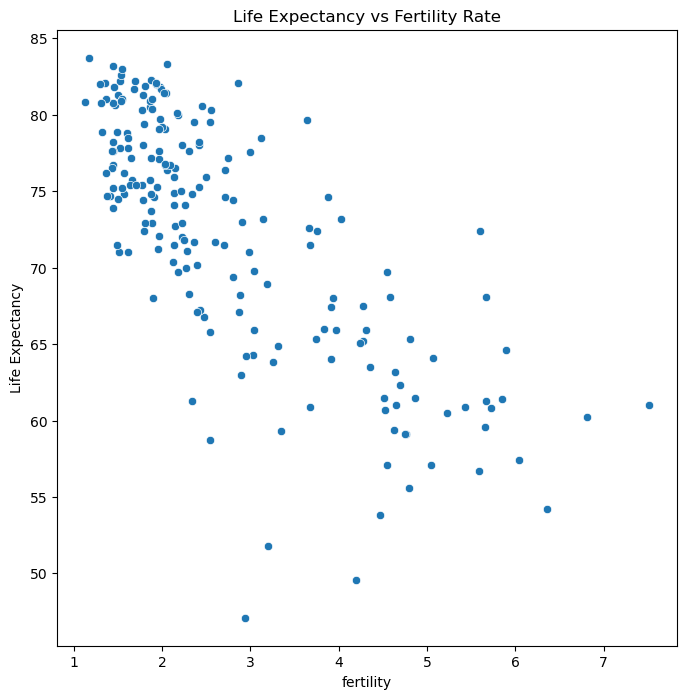

year                0
country             0
continent          55
population          2
fertility          34
life expectancy    25
dtype: int64

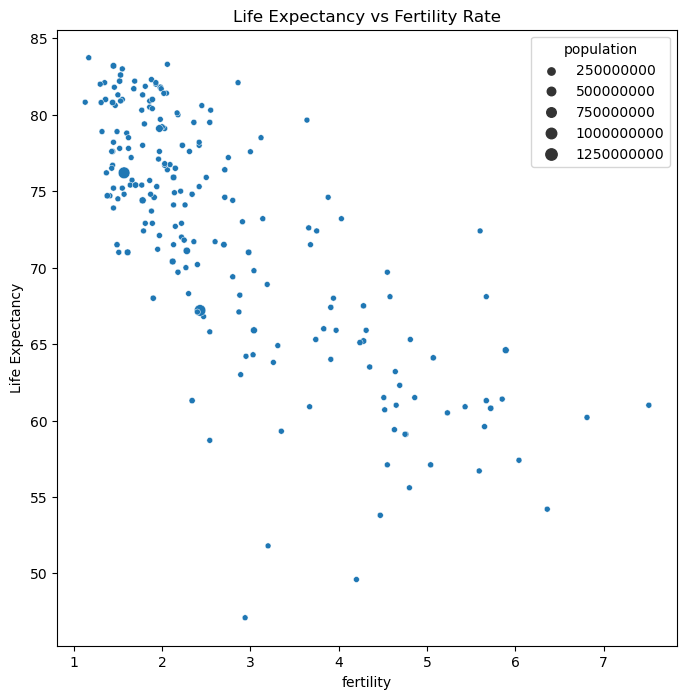

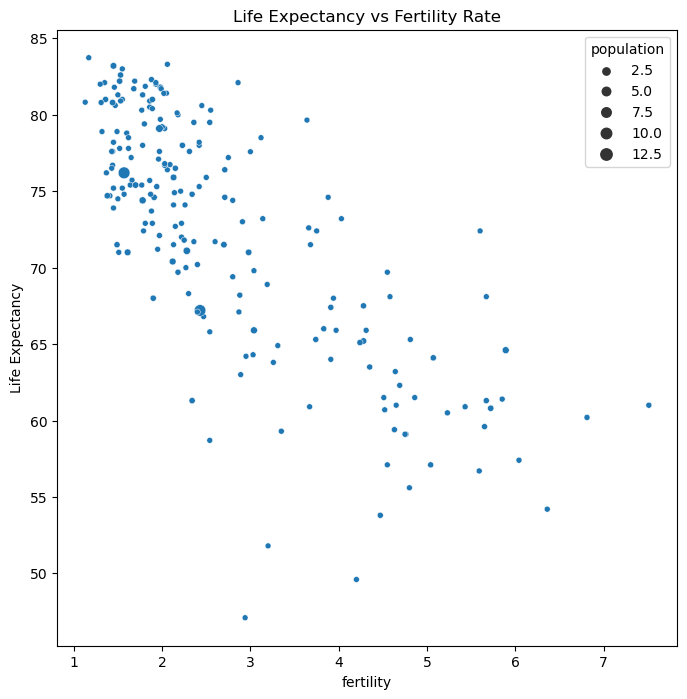

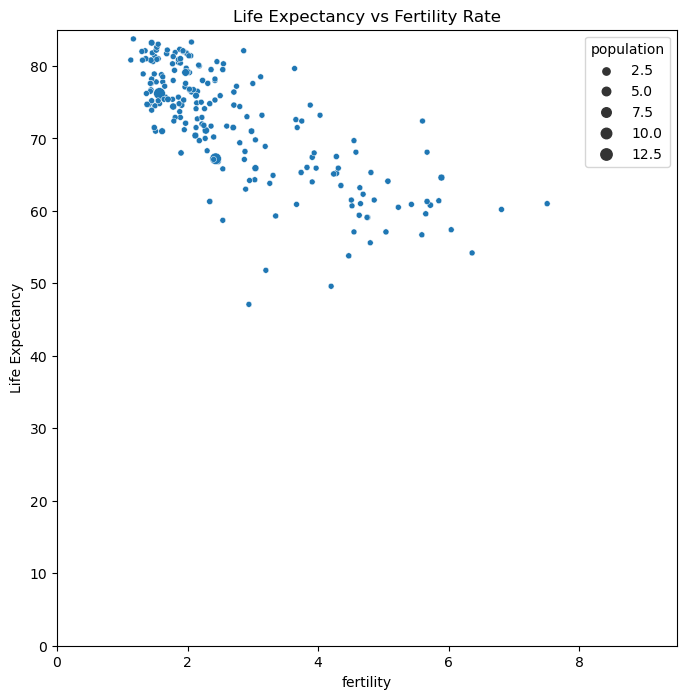

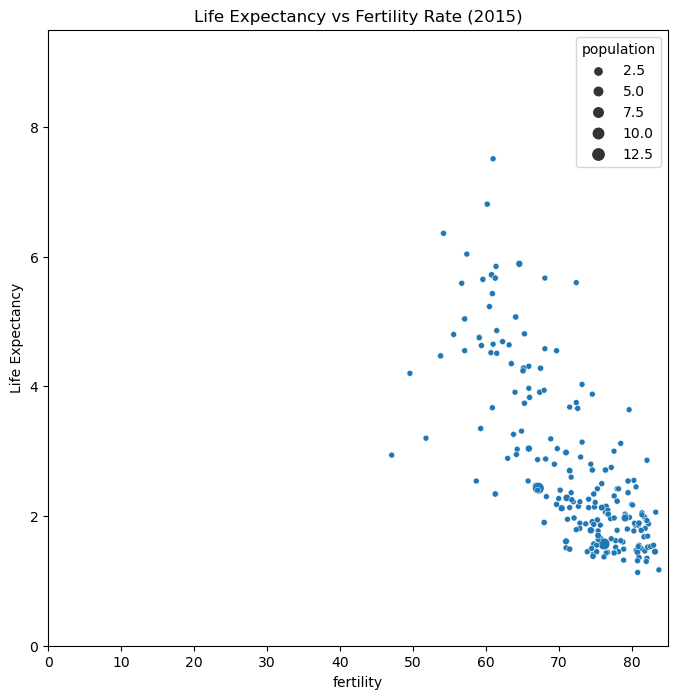

> ## Warmer:   [Get to know this week's data](http://spiced-12-weeks-da.s3-website.eu-central-1.amazonaws.com/03-visual-data-analysis/eda.html)
>- Download the Jupyter notebook **pandas_eda_warmer.ipynb**
>- Download the files **continents.csv** and  **population.csv**
>- Save the notebook in the EDA lecture folder and the .csv files in the data folder
>- Open the notebook with Jupyter Notebook
>- Complete and Execute the commands

## Key Concepts

According to Wikipedia, EDA “is an approach to analyzing datasets to summarize their main characteristics, often with visual methods”.  
In other words, it is about knowing the data, gaining a certain amount of familiarity with the data, before one starts to extract insights from it.

### General Outline of EDA

- Preview data
- Check total number of entries and column types
- Check for null values
- Check duplicate entries
- Plot distribution of data (numeric or cagtegorical)

A high level introduction of these concepts are here in this lesson. However many of these will be looked at in more depth throughout the course and some of the basics of EDA were performed in week 2. 

Here are some new `pandas` commands that are used during EDA:

command                       | description
---                           | ---
`.dtypes`                     | returns the dtypes in the DataFrame
`.astype()`             |   cast a pandas object to a specified dtype
`.info()`         | returns a concise summary of a DataFrame
`.isnull()`      | detects missing values for an array-like object
`.duplicated()`          | returns boolean Series denoting duplicate rows
`.drop_duplicates()`                    | returns DataFrame with duplicate rows removed
`.value_counts()`       | returns a Series containing counts of unique rows in the DataFrame

### Preview data

After reading in the data the first thing to do to get a feel for the data is to look at the size and shape of the dataframe. Then looking at the first few columns gives a sense of what is being dealt with. The common `pandas` commands used here would be `.shape`, `.size`, `head()` and more. 


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/population.csv')

In [3]:
df.head()

,Total population,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


### **Check entries and datatypes**

When exploring the data the data types can be of valuable help. If there is a column in which statisical analysis should be made but the column is `string` known in `pandas` as an `object` then the column datatype needs to be converted to `integer`. Only then is `pandas` able to perform mathimatical methods on the dersired data.

There is more than one way to check the datatypes. One that is straighforward is using the `.dtypes` attribute:

In [4]:
df.dtypes

Total population     object
year                  int64
population          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22275 entries, 0 to 22274
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total population  22275 non-null  object 
 1   year              22275 non-null  int64  
 2   population        20176 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 522.2+ KB


In [6]:
df.shape

(22275, 3)

###  Check for null values

What is a `null` or `NaN` value? It is a placeholder for missing data. It just means that there is no data in that cell. When getting an understanding of the data, know how many values are missing is of high importance. 

It will not only help getting deeper knowledge of the data but will also lead to conclusions on what to do with the missing data. What to do about mising data is a challenge that will be dealt with in future lessons. **For now recognizing what is missing will be focused on.**

The `.isnull()` method will return a DataFrame or Series as a boolean mask. In this case the `True` values are the misssing values:

In [8]:
df.head()

,Total population,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


In [7]:
df.isnull()

,Total population,year,population
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
22270,False,False,True
22271,False,False,True
22272,False,False,True
22273,False,False,True


What is nice about boolean mask is not only can they be used to filter DataFrames but they can also but summed up where `False` is 0 and `True` is 1. So if the `.sum()` method is added to the above command the total missing values will be returned. 


In [9]:
# gives values of 'true = 1' values

df.isnull().sum()

# output similar to .dtypes view

Total population       0
year                   0
population          2099
dtype: int64

In [10]:
# another function doing same job is 'is NA' 

df.isna()

,Total population,year,population
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
22270,False,False,True
22271,False,False,True
22272,False,False,True
22273,False,False,True


In [11]:
#can also do not na, or not null

df.notnull()

,Total population,year,population
0,True,True,False
1,True,True,True
2,True,True,False
3,True,True,True
4,True,True,True
...,...,...,...
22270,True,True,False
22271,True,True,False
22272,True,True,False
22273,True,True,False


### Check for duplicate entries

Duplicate entries refers to rows that have the same data in every column and are then in many cases irrelevant. To check for such data the `.duplicated()` method can be used. It also returns a boolean mask on which `.sum()` can be used to find out the amount of *duplicated*  observations.

In [12]:
# checks if every row is unique
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22270    False
22271    False
22272    False
22273    False
22274    False
Length: 22275, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
# checks specific column

df.duplicated('Total population')

0        False
1        False
2        False
3        False
4        False
         ...  
22270     True
22271     True
22272     True
22273     True
22274     True
Length: 22275, dtype: bool

In [16]:
# this checks line by line so will ignore the first occurance but following that, outputs true once duplicate found

df['Total population'].duplicated().sum()

22000

### Plot distribution of data

Looking at the distribution of the data can reveal many statisical insights. Trend or seasonality may become apparent and other statistics such as max and min can be visualized. Some numeric data can be extracted from categorical columns such as the count of each category. 

In order to count the total occurances of a category or even the total occurances of a `integer` or `float` the method `.value_counts()` can be used. 

In [17]:
df['population'].value_counts()

905.0         9
799.0         9
63.0          7
2574000.0     6
6700.0        6
             ..
7249855.0     1
11114995.0    1
57029.0       1
2138133.0     1
38745.0       1
Name: population, Length: 19699, dtype: int64

>### Are there any outliers? 
> -> Will be covered later in the week..

In [18]:
pop_63 = df[df['population']==63]
pop_63

,Total population,year,population
12553,Pitcairn,1980,63.0
12828,Pitcairn,1981,63.0
13103,Pitcairn,1982,63.0
14203,Pitcairn,1986,63.0
14478,Pitcairn,1987,63.0
15853,Pitcairn,1992,63.0
16128,Pitcairn,1993,63.0


In [ ]:
pop_HlySee = df[df['Total population']=='Holy See']
pop_HlySee

In [30]:
pop_Pitcairn = df[df['Total population']=='Pitcairn']
pitcairn_val_mask = pop_Pitcairn.isnull()


,Total population,year,population
178,NaN,NaN,NaN
453,NaN,NaN,NaN
728,NaN,NaN,NaN
1003,NaN,NaN,NaN
1278,NaN,NaN,NaN
...,...,...,...
21078,NaN,NaN,NaN
21353,NaN,NaN,NaN
21628,NaN,NaN,NaN
21903,NaN,NaN,NaN


In [20]:
pop_HlySee = df[df['Total population']=='Holy See']
pop_HlySee

,Total population,year,population
96,Holy See,1800,905.0
371,Holy See,1810,905.0
646,Holy See,1820,905.0
921,Holy See,1830,905.0
1196,Holy See,1840,905.0
...,...,...,...
20996,Holy See,2011,799.0
21271,Holy See,2012,799.0
21546,Holy See,2013,799.0
21821,Holy See,2014,799.0
